In [123]:
import h5py
import numpy as np
import mat73
from pyriemann.utils.ajd import ajd_pham, rjd
from time import time
def check_symmetric(a, rtol=1e-05, atol=1e-08):
    return np.allclose(a, a.T, rtol=rtol, atol=atol)

In [2]:
data_dict = mat73.loadmat('EEG_ex.mat')['EEG']
print(data_dict)

{'Channels': array([[ 2.44549773e+07,  3.48610704e+07,  5.05387027e+07, ...,
         5.97433658e+05,  4.77484960e+06, -6.91225931e+06],
       [ 2.40922129e+07,  3.43439458e+07,  4.97890492e+07, ...,
         5.88583983e+05,  4.70403530e+06, -6.80971582e+06],
       [ 2.35797144e+07,  3.36133729e+07,  4.87299490e+07, ...,
         5.76063922e+05,  4.60397510e+06, -6.66485809e+06],
       ...,
       [-1.58900085e+01, -1.87447743e+01, -3.83034729e+01, ...,
        -2.46018353e+01, -3.67793493e+01, -2.89171565e+01],
       [-1.26987635e+01, -1.50993723e+01, -3.17982845e+01, ...,
        -2.14077777e+01, -3.09301429e+01, -2.38718063e+01],
       [-7.52003289e+00, -9.44977953e+00, -1.88382732e+01, ...,
        -1.26303105e+01, -1.85433051e+01, -1.45152705e+01]]), 'ElectrodesName': ['FP1', 'FP2', 'F5', 'AFz', 'F6', 'T7', 'Cz', 'T8', 'P7', 'P3', 'Pz', 'P4', 'P8', 'O1', 'Oz', 'O2'], 'EpochClass': array([1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0.

In [112]:
frequency = data_dict['Fs']
signals = data_dict['Channels'].T[:,:512]
eletrodes_names = data_dict['ElectrodesName']
epochclass = data_dict['EpochClass']
print(frequency, signals.shape, eletrodes_names,epochclass)

128.0 (16, 512) ['FP1', 'FP2', 'F5', 'AFz', 'F6', 'T7', 'Cz', 'T8', 'P7', 'P3', 'Pz', 'P4', 'P8', 'O1', 'Oz', 'O2'] [1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.
 0. 0. 1

In [113]:
from pyriemann.spatialfilters import AJDC
ajdc = AJDC(fmin=1,fmax=20,fs=frequency,dim_red={'n_components': 6},overlap = 0.5)
ajdc.fit(X=np.array([[signals]]))
x_new = ajdc.transform(np.array([signals]))[0]

Dimension reduction of Whitening on 6 components


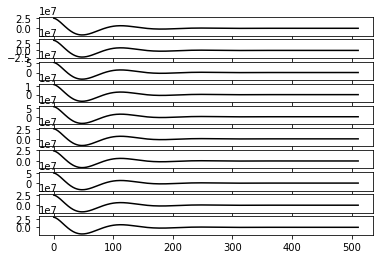

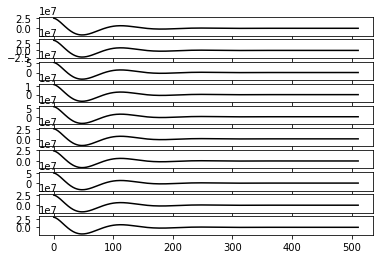

In [114]:
from pyriemann.utils.viz import plot_waveforms
import matplotlib.pyplot as plt
plot_waveforms(np.array([signals[:10,:]]),display='mean')

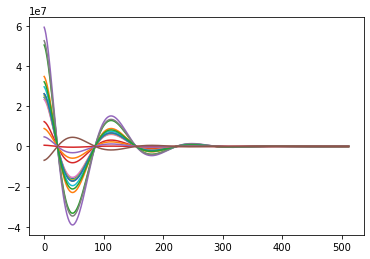

In [115]:
for i in range(signals.shape[0]):
    plt.plot(signals[i,:])

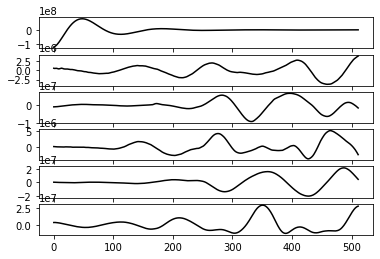

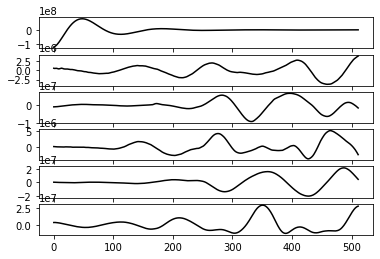

In [116]:
plot_waveforms(np.array([x_new]),display='mean')

[-0.19628094 -0.27980573 -0.40562898 -0.09907284 -0.47675292 -0.2105896
 -0.18788196 -0.42274532 -0.20256845 -0.23841491 -0.21010142 -0.07149545
 -0.25840241 -0.00479555 -0.0383246   0.05547974]


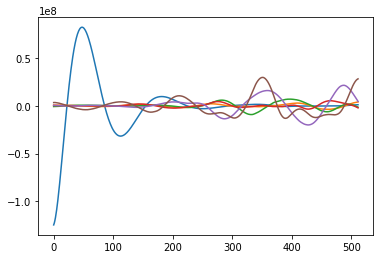

In [117]:
for i in range(x_new.shape[0]):
    plt.plot(x_new[i,:])
print(ajdc.backward_filters_[:,0])

Dimension reduction of Whitening on 6 components
[-0.19628094 -0.27980573 -0.40562898 -0.09907284 -0.47675292 -0.2105896
 -0.18788196 -0.42274532 -0.20256845 -0.23841491 -0.21010142 -0.07149545
 -0.25840241 -0.00479555 -0.0383246   0.05547974]


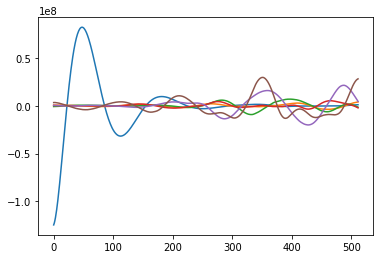

In [122]:
ajdc = AJDC(fmin=1,fmax=20,fs=frequency,dim_red={'n_components': 6},overlap = 0.5)
ajdc.fit(X=np.array([[signals]]))
x_new = ajdc.transform(np.array([signals]))[0]
for i in range(x_new.shape[0]):
    plt.plot(x_new[i,:])
print(ajdc.backward_filters_[:,0])